In [11]:
import numpy as np

## 과제 1
ReLu activation function과 derivative function을 구현해보세요
- Hint : np.maximum 함수 사용하면 편리합니다
- 다른 방법 사용하셔도 무방합니다


In [3]:
def relu(x):
    return np.maximum(0,x)

In [2]:
def d_relu(x):
    if x > 0:
        return 1
    else:
        return 0 

In [5]:
# 확인!
print(relu(5))
print(d_relu(-5))

5
0


## 과제 2
Deep Learning Basic 코드 파일의 MLP implementation with Numpy library using MNIST dataset 코드 참고해서
Three layer MLP 일 때의 backward_pass 함수를 완성해주세요.   
- Hint : 코드 파일의 예시는 Two layer MLP


In [ ]:
def backward_pass(x, y_true, params):
    dS3 = params["A3"] - y_true

    grads = {}

    grads["dW3"] =  np.dot(dS3, params["A2"].T)/x.shape[1]
    grads["db3"] =  (1/x.shape[1])*np.sum(dS3, axis=1, keepdims=True)/x.shape[1]
    
    dA2 = np.dot(params["W3"].T, dS3)
    dS2 = dA2 * d_sigmoid(params["S2"])
    
    grads["dW2"] = np.dot(dS2, params["A1"].T)/x.shape[1]
    grads["db2"] = np.sum(dS2, axis=1, keepdims=True)/x.shape[1]
    
    dA1 = np.dot(params["W2"].T, dS2)
    dS1 = dA1 * d_relu(params["S1"])

    grads["dW1"] = np.dot(dS1, x.T)/x.shape[1]
    grads["db1"] = np.sum(dS1, axis=1, keepdims=True)/x.shape[1]
    return grads

## 과제 3
Deep Learning Basic 코드 파일의 MLP implementation with Pytorch library using MNIST dataset 코드 참고해서
Three layer MLP를 구한후, 학습을 돌려 보세요

hyperparameter는 다음과 같이 설정

- epochs : 100
- hiddensize : 128, 64 (two layer)
- learning_rate : 0.5

In [2]:
# Assignment 3 구현은 여기서 ()
from torchvision import transforms, datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [3]:
# 이미지를 텐서로 변경
transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
trainset = datasets.MNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.MNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./.data/MNIST/raw/train-images-idx3-ubyte.gz to ./.data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./.data/MNIST/raw/train-labels-idx1-ubyte.gz to ./.data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./.data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./.data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/MNIST/raw



In [16]:
BATCH_SIZE = 100
train_loader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
test_loader =  torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

### 3-layer mlp 구현

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(784,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64,10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 784)
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)

        return out

In [20]:
model = Net()
model

Net(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

In [22]:
def train(model, train_loader, optimizer):
    model.train()

    batch_losses = []

    for data, target in train_loader:
        optimizer.zero_grad()
   
        output = model(data)

        loss = criterion(output, target)
        batch_losses.append(loss)

        loss.backward()

        optimizer.step()
    
    avg_loss = sum(batch_losses) / len(batch_losses)
    
    return avg_loss

In [23]:
def evaluate(model, test_loader):
    # 모델을 평가 모드로 전환
    model.eval()

    batch_losses = []
    correct = 0 

    with torch.no_grad(): 
        for data, target in test_loader:

            output = model(data)

            loss = criterion(output, target)
            batch_losses.append(loss)


            pred = output.max(1, keepdim=True)[1]

            correct += pred.eq(target.view_as(pred)).sum().item()

    avg_loss =  sum(batch_losses) / len(batch_losses)

    #정확도 계산
    accuracy = 100. * correct / len(test_loader.dataset)

    return avg_loss, accuracy

In [24]:
EPOCHS = 100

for epoch in range(1, EPOCHS + 1):
    train_loss = train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Train Loss: {:.4f}\tTest Loss: {:.4f}\tAccuracy: {:.2f}%'.format(
          epoch, train_loss, test_loss, test_accuracy))

[1] Train Loss: 0.3608	Test Loss: 0.1444	Accuracy: 95.60%
[2] Train Loss: 0.1144	Test Loss: 0.0973	Accuracy: 97.01%
[3] Train Loss: 0.0796	Test Loss: 0.0867	Accuracy: 97.37%
[4] Train Loss: 0.0601	Test Loss: 0.0784	Accuracy: 97.71%
[5] Train Loss: 0.0483	Test Loss: 0.0865	Accuracy: 97.38%
[6] Train Loss: 0.0395	Test Loss: 0.0706	Accuracy: 97.88%
[7] Train Loss: 0.0318	Test Loss: 0.0749	Accuracy: 97.85%
[8] Train Loss: 0.0268	Test Loss: 0.0809	Accuracy: 97.85%
[9] Train Loss: 0.0180	Test Loss: 0.0787	Accuracy: 97.94%
[10] Train Loss: 0.0175	Test Loss: 0.1048	Accuracy: 97.32%
[11] Train Loss: 0.0146	Test Loss: 0.0805	Accuracy: 98.08%
[12] Train Loss: 0.0134	Test Loss: 0.0852	Accuracy: 97.90%
[13] Train Loss: 0.0099	Test Loss: 0.1195	Accuracy: 97.23%
[14] Train Loss: 0.0073	Test Loss: 0.0936	Accuracy: 97.86%
[15] Train Loss: 0.0034	Test Loss: 0.0816	Accuracy: 98.09%
[16] Train Loss: 0.0018	Test Loss: 0.0803	Accuracy: 98.19%
[17] Train Loss: 0.0010	Test Loss: 0.0844	Accuracy: 98.21%
[18] T

## 과제 4
과제 3 부분의 성능을 지금까지 배운 지식을 바탕으로 향상시켜보세요

- Hint : Activation function, hyperparameter setting

In [8]:
model_dict = {}
loss_dict = {}
accuracy_dict = {}
# optimizer에 따른 학습 정도를 살펴볼 4가지 테스트 케이스
optimizer_case = ['SGD','Adam','AdaGrad','RMSprop']
for key in optimizer_case:
    model_dict[key] = Net()
    loss_dict[key] = []
    accuracy_dict[key] = []

In [9]:
optimizer_dict = {}
optimizer_dict['SGD'] = optim.SGD(model_dict['SGD'].parameters(),lr = 0.001 )
optimizer_dict['Adam'] = optim.Adam(model_dict['Adam'].parameters(),lr= 0.001)
optimizer_dict['AdaGrad'] = optim.Adagrad(model_dict['AdaGrad'].parameters(), lr=0.001)
optimizer_dict['RMSprop'] = optim.RMSprop(model_dict['RMSprop'].parameters(),lr=0.001)

In [12]:
# loss_function, total batch size, epoch 정의
loss_function = nn.CrossEntropyLoss()
total_batch = len(train_loader) # 600 (60000 / 100) => (train dataset / batch_size)
epochs = np.arange(1,22)

In [17]:
# 총 4가지 optimizer를 사용하여 학습
for optimizer_name, optimizer in optimizer_dict.items():
    print(optimizer_name)
    for epoch in epochs:
        cost=0
        for images, labels in train_loader: 

            images = images.reshape(100,784) 
           
            model_dict[optimizer_name].zero_grad()
            
            # feed forward
            predict = model_dict[optimizer_name].forward(images)
            
            # loss 값 구하기
            loss = loss_function(predict,labels) # 예측된 것과 label이 얼마나 차이가 나는지
            
            # back propagation
            loss.backward()
            
            # optimizer update
            optimizer.step()
            
            cost += loss 
            
        with torch.no_grad(): # 미분하지 않겠다
            total = 0
            correct = 0
            for images, labels in test_loader:
                images = images.reshape(100,784)
                
                outputs = model_dict[optimizer_name].forward(images)

                _,predict = torch.max(outputs, 1) 
                
                total += labels.size(0)
                correct += (predict == labels).sum() 
                
            avg_cost = cost / total_batch 
            accuracy = 100 * (correct/total) 
            
            loss_dict[optimizer_name].append(avg_cost.detach().numpy())
            accuracy_dict[optimizer_name].append(accuracy)
            
            print("epoch : {} | loss : {:.6f}" .format(epoch, avg_cost))
            print("Accuracy : {:.2f}".format(100*correct/total))

SGD
epoch : 1 | loss : 2.891732
Accuracy : 23.88
epoch : 2 | loss : 2.852782
Accuracy : 25.22
epoch : 3 | loss : 2.800253
Accuracy : 27.43
epoch : 4 | loss : 2.729746
Accuracy : 33.00
epoch : 5 | loss : 2.635366
Accuracy : 43.18
epoch : 6 | loss : 2.511418
Accuracy : 54.49
epoch : 7 | loss : 2.354779
Accuracy : 63.03
epoch : 8 | loss : 2.164510
Accuracy : 67.59
epoch : 9 | loss : 1.949882
Accuracy : 71.38
epoch : 10 | loss : 1.731589
Accuracy : 73.68
epoch : 11 | loss : 1.531803
Accuracy : 76.18
epoch : 12 | loss : 1.361957
Accuracy : 78.12
epoch : 13 | loss : 1.223091
Accuracy : 79.42
epoch : 14 | loss : 1.111377
Accuracy : 80.59
epoch : 15 | loss : 1.021345
Accuracy : 81.70
epoch : 16 | loss : 0.948193
Accuracy : 82.47
epoch : 17 | loss : 0.887827
Accuracy : 83.32
epoch : 18 | loss : 0.837265
Accuracy : 84.16
epoch : 19 | loss : 0.794481
Accuracy : 84.93
epoch : 20 | loss : 0.757807
Accuracy : 85.39
epoch : 21 | loss : 0.726214
Accuracy : 86.14
Adam
epoch : 1 | loss : 0.487355
Accura

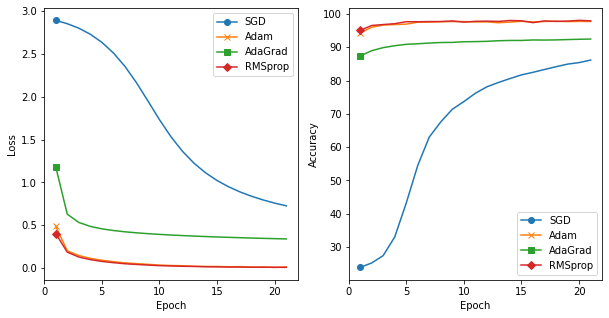

In [18]:
import matplotlib.pyplot as plt

markers = {'SGD' : 'o', 'Adam' : 'x','AdaGrad' : 's', 'RMSprop' : 'D' }
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

for key in optimizer_case:
    plt.plot(epochs,loss_dict[key], marker = markers[key], markevery=100, label = key)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.subplot(1,2,2)
for key in optimizer_case:
    plt.plot(epochs, accuracy_dict[key],marker = markers[key], markevery=100, label=key)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**무엇을 보완하였고, 왜 보완되었는지에 대한 자유 서술 (아래에)**

In [ ]:
(1) optimizer: RMS prop 사용
(2) hyperparameter: learning rate -> 0.001로 설정
                    epoch -> 22로 설정

- 실험 결과 동일 lr 하에서 RMS prop 이 가장 좋은 성능을 보임을 확인할 수 있었음, RMS prop으로 변경
- lr가 커서 test loss가 수렴하지 못하는 현상 발견 -> lr를 0.001로 줄여 재학습
- epoch가 100인 점이 train loss와 test loss간 차이에 영향을 주었다고 생각 -> 22로 줄여 재학습 

(3) 그 외 시도해 볼 수 있는 것
- 앞서 변경한 hyperparmeter을 다른 값으로 변경 후 재학습 (lr 키우면서/epoch 늘리면서 혹은 줄여가며) 
- 모델에서 사용한 Relu외 다른 Activation func 적용해보기 (ex. leaky Relu, elu ..)
- net 구조 변경 (hidden size, layer 개수..)
- hyperparameter와 net의 구조에 따라서 optimizer 별로 성능 차이가 존재하게 되므로 적절히 변경해가며 관찰하는 것이 필요